In [ ]:
서포트 벡터 머신(SVM) : 선형식별기 중에 높은 성능을 가진다
 - 2개의 클래스가 있는 2차원 데이터 Xn로 클래스 두 개를 분류해서 마진을 극대화 시킨 후 노이즈를 기준으로 하드 마진, 소프트 마진으로 나뉜다.
    y = wx + w0
    
 - 분류를 위한 구현체와 회귀를 위한 기법
    - 분류
        1) sklearn.svm.SVC : 이진 및 다중클래스 선형분류와 커널분류를 이용한 LIBSVM 구현체, 
                             하이퍼 파라미터(C, kernel, degree, gamma,)
        2) svm.NuSVR :  SVC와 동일한 기능으로 분류, 파라미터(C, kernel, degree, gamma,)
        
        3) svm.OneClassSVM : 비지도 이상치 검출, 파라미터(C, kernel, degree, gamma,)
        
        4) svm.LinearSVC : LIBlinear 기반 이진 및 다중 클래스 선형 분류기, 파라미터(penalty, loss, C,)
            
========================================================================================================================
    
회귀
 1) svm.SVR : 회귀를 위한 LIBSVM 구현체, (kernel, degree, gamma,)
 2) svm.NuSVR : SVC와 동일한 기능으로 분류, (nu, C, kernel, degree, gamma)
    
========================================================================================================================

하이퍼 파라미터
 1) C : 벌점(penalty value)을 지정한다. 이 값을 줄이면 마진이 커진다. 마진의 비율만큼 노이즈가 무시된다. 동시에 연산이 많아진다.
        최적값 np.logspace(-3,3,7) 범위내에서 선택된다.
 
 2) kernel : SVM의 비선형 파라미터 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' rbf(radial basis function)를 가장 많이 사용한다.
             두 데이터 표본 데이터를 구현시에 유사도 측정하는 기준
 
 3) degree : kernel = poly와 함께 사용하며 다항식에서 차수를 나타낸다. 2~5 범위내의 차원값이 최적
        
 4) gamma :'poly', 'rbf', 'sigmoid'의 계수로 사용된다. np.logspace(-3,3,7) 범위내에서 그리드 검색
            감마값이 높을 수록 효과적인 데이터 평가 비율이 높다.
        
 5) nu : NuSVR과 NuSVC를 사용하는 회귀 및 분류를 위한 파라미터.
         명확하게 분류되지 않은 대상(점), 잘못 분류된 점, 정확하게 마진 내부에 있는 점들을 훈련 후 예측한다.
         마진을 높이는 비율인 C와 같은 동작을 한다.
            
 6) epsilon : 점의 실제 값에 어떤 벌점도 부과되지 않은 최대범위, SVR이 얼마나 오차범위를 허용하도록 할 지 명시한다.
              np.insert(np.logspace(-4,2,7), 0, [0]) 권장범위
        
* 퍼셉트론은 가장 단순하고 빠른 판별 분류 모델이지만 판별경계선은 제공되지않아 SVC를 사용한다. 
  퍼셉트론 기반모델의 안정적판별 경계는 SVC를 사용한다.  << 손글씨, 얼굴 이미지 인식 >>

In [5]:
import numpy as np
# logspace() : 지정된 범위내에서 로그스케일에 대한 배치된 배열을 생성, 로그 버전 함수에 사용 _균등 배열 생성
            # 지수 함수의 생성값을 배열로 생성해주는 함수
# linspace() : 선형으로 배치 _균등 배열 생성

# linspace()로 2의 n승 값 연습
a = np.linspace(1,10,10)
print(a)
base = 2
res = base ** a
print(res)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[   2.    4.    8.   16.   32.   64.  128.  256.  512. 1024.]


In [12]:
res2 = np.logspace(1,10,10, base=2)  # 지수함수, 등비수열 배열을 사용할 때
print(res2)

[   2.    4.    8.   16.   32.   64.  128.  256.  512. 1024.]


In [10]:
res3 = np.logspace(-3,3,7)
print(res3)

[1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]


In [17]:
# 1) svr을 이용해서 클래스의 회귀값을 확인해보자
from sklearn import preprocessing, linear_model, svm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1-1. 샘플 데이터 생성
numSample = 80
x = np.sort(5 * np.random.rand(numSample,1), axis=0)
y = np.sin(x).ravel()
y = y + 0.2 * (np.random.randn(numSample))
x_true = np.arange(0, 5.0, 0.1)
y_true = np.sin(x_true).ravel()

In [33]:
# 1-2. SVR()로 데이터를 분류하자
# clf_svr = svm.SVR()  # 회귀성 분류
# clf_svr = svm.SVR(kernel='rbf', C=1.0, gamma=0.1, epsilon=0.1)
clf_svr = svm.SVR(kernel='poly', C=1.0, gamma=0.1, epsilon=0.1)
# clf_svr = svm.SVR(kernel='linear', C=1.0, gamma=0.1, epsilon=0.1)

# clf_svr = svm.SVC(kernel='rbf', C=1.0, gamma=0.1)  # 분류, (오류발생) 
clf_svr.fit(x,y)
y_res = clf_svr.fit(x,y).predict(x)

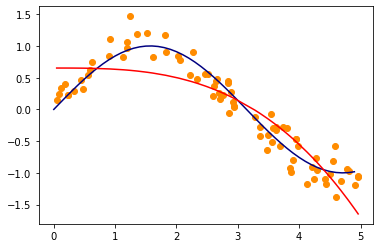

In [34]:
# 1-3. View_ 결과 확인
plt.scatter(x,y,color='darkorange', label='data')
plt.plot(x_true, y_true, color='navy', label='sin')
plt.plot(x, y_res, color='red', label='SVR(RBF)')
plt.show()

# 결과 확인 평가
# 1. SVR 그래프에서 곡선으로 피팅
# 2. sin 데이터와 결과가 흡사하다

In [67]:
# 2) SVC를 이용해서 클래스 분류해보자
from sklearn import preprocessing, linear_model, svm, datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target

# SVC 데이터 분류
# gamma = [0.001, 0.01, 0.1, 1, 10, 100]
# for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
#     for C in [0.001, 0.01, 0.1, 1, 10, 100]:

svc = svm.SVC(kernel='linear', C=1.0, gamma=0.1).fit(X,y)

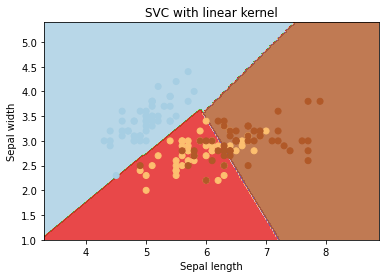

In [58]:
# view
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min) / 100

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
plt.subplot(1, 1, 1)

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

In [76]:
# 3) SVC를 이용해서 seaborn.load_dataset 데이터를 로드해서 모델링해보자
# sklearn의 LinearSVC() : 선형 SVM 처리
#             SCV() : 비선형 SVM 처리
# 장점 : 차원도 많거나 커도 정밀도(데이터의 식별)가 높다
# 단점 : 학습데이터가 늘어나면 계산량이 늘어난다.
import pandas as pd
import seaborn as sns

# 3-1. 데이터 로드
# load_dataset을 이용해서 데이터 프레임으로 변환
df = sns.load_dataset('titanic')
df

# 3-2 전처리
# NaN 값이 가장 많은 열을 삭제 deck, 두 개의 컬럼이 겹쳐서 하나 삭제 embarked, embark_town 중 겹치는 열을 삭제
rdf = df.drop(['deck', 'embark_town'], axis=1)

# age 열에 나이 데이터가 없는 모든 행을 삭제 - age(891 / 177)
rdf = rdf.dropna(subset=['age'], how='any', axis=0)
rdf

# embarked 열의 NaN 값을 승선도시 중에서 가장 많이 표시된 값(idxmax())으로 치환하기 fillna()
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()
rdf['embarked'].fillna(most_freq, inplace=True)

# 3-3. 분석 데이터 추출
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]

# ndf를 확인하고 범주형 데이터로 변환
onehot_sex = pd.get_dummies(ndf['sex'])  # 0, 1 범주형 데이터 변환 후 생성
ndf = pd.concat([ndf, onehot_sex], axis=1)  # 테이블 두 개 병합

onehot_embarked = pd.get_dummies(ndf['embarked'])  # 0, 1 범주형 데이터 변환 후 생성
ndf = pd.concat([ndf, onehot_embarked], axis=1)  # 테이블 두 개 병합

ndf.drop(['sex', 'embarked'], axis=1, inplace=True)
ndf

# 4. 데이터셋 구분
# 속성 변수
X = ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 'C', 'Q', 'S']]  # 독립변수 X
y = ndf['survived']  # 종속변수 y

# 설명 변수 데이터를 정규화 !!!!
X = preprocessing.StandardScaler().fit(X).transform(X)

# 7:3으로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=10)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# 5. 분류모델, 모형선택, sklearn
from sklearn import svm

# 모형 객체 생성
svm_model = svm.SVC(kernel = 'rbf')

# train 데이터로 모형 학습
svm_model.fit(X_train, y_train)

# test data를 가지고 y_hat를 예측(분류모델값)
y_hat = svm_model.predict(X_test)
print(y_hat[0:10])
print(y_test.values[0:10])

# 6. 모형 성능 평가 - confusion_matrix
from sklearn import metrics

svm_matrix = metrics.confusion_matrix(y_test, y_hat)
print(svm_matrix)

# 평가 지표 출력 = 성능 평가
svm_report = metrics.classification_report(y_test, y_hat)
print(svm_report)

#https://scikit-learn.org/stable/modules/svm.html  <<워크샾>>

(499, 9) (215, 9) (499,) (215,)
[0 0 1 0 0 0 1 0 0 0]
[0 0 1 0 0 1 1 1 0 0]
[[120   5]
 [ 35  55]]
              precision    recall  f1-score   support

           0       0.77      0.96      0.86       125
           1       0.92      0.61      0.73        90

    accuracy                           0.81       215
   macro avg       0.85      0.79      0.80       215
weighted avg       0.83      0.81      0.81       215



downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\USER\scikit_learn_data
Learning the dictionary... 
Partial fit of  100 out of 2400
Partial fit of  200 out of 2400
[MiniBatchKMeans] Reassigning 16 cluster centers.
Partial fit of  300 out of 2400
Partial fit of  400 out of 2400
Partial fit of  500 out of 2400
Partial fit of  600 out of 2400
Partial fit of  700 out of 2400
Partial fit of  800 out of 2400
Partial fit of  900 out of 2400
Partial fit of 1000 out of 2400
Partial fit of 1100 out of 2400
Partial fit of 1200 out of 2400
Partial fit of 1300 out of 2400
Partial fit of 1400 out of 2400
Partial fit of 1500 out of 2400
Partial fit of 1600 out of 2400
Partial fit of 1700 out of 2400
Partial fit of 1800 out of 2400
Partial fit of 1900 out of 2400
Partial fit of 2000 out of 2400
Partial fit of 2100 out of 2400
Partial fit of 2200 out of 2400
Partial fit of 2300 out of 2400
Partial fit of 2400 out of 2400
done in 15.64s.


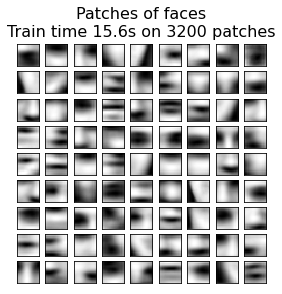

In [77]:
import time

import matplotlib.pyplot as plt
import numpy as np


from sklearn import datasets
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.image import extract_patches_2d

faces = datasets.fetch_olivetti_faces()

# #############################################################################
# Learn the dictionary of images

print('Learning the dictionary... ')
rng = np.random.RandomState(0)
kmeans = MiniBatchKMeans(n_clusters=81, random_state=rng, verbose=True)
patch_size = (20, 20)

buffer = []
t0 = time.time()

# The online learning part: cycle over the whole dataset 6 times
index = 0
for _ in range(6):
    for img in faces.images:
        data = extract_patches_2d(img, patch_size, max_patches=50,
                                  random_state=rng)
        data = np.reshape(data, (len(data), -1))
        buffer.append(data)
        index += 1
        if index % 10 == 0:
            data = np.concatenate(buffer, axis=0)
            data -= np.mean(data, axis=0)
            data /= np.std(data, axis=0)
            kmeans.partial_fit(data)
            buffer = []
        if index % 100 == 0:
            print('Partial fit of %4i out of %i'
                  % (index, 6 * len(faces.images)))

dt = time.time() - t0
print('done in %.2fs.' % dt)

# #############################################################################
# Plot the results
plt.figure(figsize=(4.2, 4))
for i, patch in enumerate(kmeans.cluster_centers_):
    plt.subplot(9, 9, i + 1)
    plt.imshow(patch.reshape(patch_size), cmap=plt.cm.gray,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())


plt.suptitle('Patches of faces\nTrain time %.1fs on %d patches' %
             (dt, 8 * len(faces.images)), fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

plt.show()

(400, 64, 64)
(400, 4096)
(400,)
[0.925 0.775 0.875 0.675 0.75 ]
Mean score : 0.8(+/- 0.04472135954999579)
None
accuracy : 1.0
accuracy : 0.925


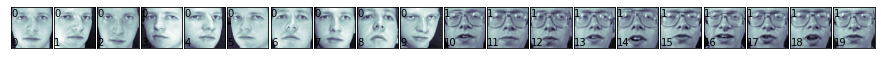

In [90]:
# SVM을 사용해 이미지 데이터로 모델링 해보자
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_olivetti_faces 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# 데이터 로드
faces = fetch_olivetti_faces()
# print(faces.DESCR)
print(faces.images.shape)  # (64*64 이미지 400장)
print(faces.data.shape)  # (64*64 이미지 일렬로 400개)
print(faces.target.shape)  # 400*1 = 정답 데이터가 400개

def print_faces(image, target, top_n):
    fig = plt.figure(figsize = (12,12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    
    for i in range(top_n):
        p = fig.add_subplot(20, 20, i+1, xticks=[], yticks=[])
        p.imshow(image[i], cmap=plt.cm.bone)
        
        p.text(0,14, str(target[i]))
        p.text(0,60, str(i))
        
print_faces(faces.images, faces.target, 20)

# 모델 생성
svc = SVC(kernel='linear')

# 학습용 데이터, 검증용 데이터 분철
X = faces.data  # (64*64 일렬로 400개)
y = faces.target  # 400*1 = 정답 데이터가 400

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.5, random_state=0)

# XFold - K겹 교차검증 -> train -> train -> validation
from sklearn.model_selection import cross_val_score, KFold
from scipy.stats import sem

# k=5 [1,2,3,5] [5]
def my_cross(clf, x, y, K):
    res_cv = KFold(n_splits=K, random_state=0, shuffle=True)
    score = cross_val_score(clf, x, y, cv=res_cv)
    print(score)
    print('Mean score : {}(+/- {})'.format(np.mean(score), sem(score)))  # sem() 배열에 있는 값 평균의 표준오차
    
print(my_cross(svc, x_train, y_train, 5))

# 성능 평가
def train_test(clf, x_train, x_test, y_train, y_test):
    clf.fit(x_train, y_train)
    print('accuracy :', clf.score(x_train, y_train))  # 학습 데이터
    print('accuracy :', clf.score(x_test, y_test))  # 테스트 데이터
    
train_test(svc, x_train, x_test, y_train, y_test)

In [95]:
# SVM을 사용해 이미지 데이터로 모델링 해보자
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import *
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# 데이터 로드
faces = load_iris()
# print(faces.DESCR)
print(faces.data.shape)  # (64*64 이미지 일렬로 400개)
print(faces.target.shape)  # 400*1 = 정답 데이터가 400개

# 모델 생성
svc = SVC(kernel='linear')

# 학습용 데이터, 검증용 데이터 분철
X = faces.data  # (64*64 일렬로 400개)
y = faces.target  # 400*1 = 정답 데이터가 400

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.5, random_state=0)

# XFold - K겹 교차검증 -> train -> train -> validation
from sklearn.model_selection import cross_val_score, KFold
from scipy.stats import sem

# k=5 [1,2,3,5] [5]
def my_cross(clf, x, y, K):
    res_cv = KFold(n_splits=K, random_state=0, shuffle=True)
    score = cross_val_score(clf, x, y, cv=res_cv)
    print(score)
    print('Mean score : {}(+/- {})'.format(np.mean(score), sem(score)))  # sem() 배열에 있는 값 평균의 표준오차
    
print(my_cross(svc, x_train, y_train, 5))

# 성능 평가
def train_test(clf, x_train, x_test, y_train, y_test):
    clf.fit(x_train, y_train)
    print('accuracy :', clf.score(x_train, y_train))  # 학습 데이터
    print('accuracy :', clf.score(x_test, y_test))  # 테스트 데이터
    
train_test(svc, x_train, x_test, y_train, y_test)

(150, 4)
(150,)
[0.93333333 1.         1.         1.         0.93333333]
Mean score : 0.9733333333333334(+/- 0.016329931618554516)
None
accuracy : 0.9733333333333334
accuracy : 0.9733333333333334


In [ ]:
클러스터링 : 클래스 분류 방법 중 정답 레이블이 없는 클래스를 분류(실행 속도가 빠르고 확장성)
    복수의 샘플 데이터가 많은 경우, 패턴이 모호한 경우 등에 적용한다.
        ex) 고객 세분화, 유전자 분류
        
k-means : 정답 레이블이 있는 데이터를 분류
          K - 클러스터 수를 나타내며 반드시 데이터 수보다 작은 값으로 지정(클래스 수 < 데이터 개수)